# Learning low-rank Gaussian embeddings from scratch for a real-world graph

This notebook shows you how to use gGN to learn node Gaussian embeddings from scratch. To this aim, the graph used for learning node representation was induced from the [GO](http://geneontology.org/). In particular, the sub-ontology called Cellular Component (CC) was used. 

In addition, the notebook also shows you how to learn Gaussian embeddings using two different approximations for the covariance matrices $\Sigma$: diagonal and low-rank.

Finally, the loss values yielded when both approximations for learning the Gaussian embeddings are visualized to demonstrate the benefits of the low-rank approximation.

## Preamble

In [ ]:
#@title Install gGN
url = "git+https://github.com/blindcosmos/ggn.git"

# to avoid dependency conflicts on colab
!pip uninstall -y imgaug > /dev/null 
!pip uninstall -y albumentations > /dev/null

!pip install -U {url} > /dev/null

  Running command git clone -q https://github.com/blindcosmos/ggn.git /tmp/pip-req-build-srshqw6d


In [ ]:
#@title Import libraries
import numpy as np
import matplotlib.pyplot as plt

# global variable
base_url = 'https://raw.githubusercontent.com/blindcosmos/ggn/main/data'

## Input graph

Since gGO uses the shortest path lengths from a graph, here a pre-built matrix with such lengths is downloaded to be used for node learning.

In [ ]:
#@title Download the pre-built matrix of shortest path lengths
mat_fin = 'cc!spmat.npz'
suf_dir = f'/spls/{mat_fin}'
url_mat = base_url + suf_dir
!wget -q {url_mat}

## Learn Gaussian embeddings

Given an input graph with $n$ nodes, gGN learns  for each node $i$ an embedding with the form $\mathcal{N}(\mu_i, \Sigma_i)$, where $\mu_i$ is the mean in $\mathbb{R}^{d}$ and $\Sigma_i$ is the covariance matrix in $\mathbb{R}^{d\times d}$.

In the diagonal approximation, $\Sigma_i=D_i$, where $D_i\in\mathbb{R}^{d\times d}$ is a diagonal matrix. In contrast, in the low-rank approximation, $\Sigma_i=D_i+P_iP_i^T$, where $P_i\in\mathbb{R}^{d\times r}$ and $r$ is the rank.

In [ ]:
#@title Learn diagonal embeddings
#@markdown **Note:** increasing the below parameters leads to a higher use of computational resources that may be crashed the Colab instance.
use_cuda    = 0 # >0 use cuda
prefix_out0 = 'diagonal_' # prefix for output files

emb_dim     = 3  # @param {type:"slider", min:1, max:20, step:1}

Σ = "Diagonal" #@param ["Spherical", "Diagonal"]
sigma_type0 = 0 if Σ == "Diagonal" else -1

num_epochs  = 30  # @param {type:"slider", min:1, max:200, step:1}
batch_size  = 128 # @param {type:"slider", min:1, max:1024, step:1}

# learn embeddings
!gGN {mat_fin} {emb_dim} {sigma_type0} {num_epochs} {batch_size} {use_cuda} {prefix_out0}

/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
---Epoch 0: Loss 2127.6926 9.46 sec ---
---Epoch 5: Loss 1352.6083 5.08 sec ---
---Epoch 10: Loss 1057.4299 5.28 sec ---
---Epoch 15: Loss 892.8222 5.14 sec ---
---Epoch 20: Loss 781.3186 5.26 sec ---
---Epoch 25: Loss 701.0506 5.17 sec ---


In [ ]:
#@title Learn low-rank embeddings
#@markdown **Note:** increasing the below parameters leads to a higher use of computational resources that may be crashed the Colab instance.
prefix_out1 = 'lowrank1_'

emb_dim = 3  # @param {type:"slider", min:1, max:20, step:1}

# second set of arguments
Σ_rank = 1   # @param {type:"slider", min:1, max:5, step:1}        

num_epochs = 30  # @param {type:"slider", min:1, max:200, step:1}
batch_size = 128 # @param {type:"slider", min:1, max:1024, step:1}

# train low-rank Gaussian embeddings
!gGN {mat_fin} {emb_dim} {Σ_rank} {num_epochs} {batch_size} {use_cuda} {prefix_out1}

/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)
/usr/local/lib/python3.7/dist-packages/ggn/distances.py:119: UserWarning: torch.triangular_solve is deprecated in favor of torch.linalg.solve_triangularand will be removed in a future PyTorch release.
torch.linalg.solve_triangular has its arguments reversed and does not return a copy of one of the inputs.
X = torch.triangular_solve(B, A).solution
should be replaced with
X = torch.linalg.solve_triangular(A, B). (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:1672.)
  A = torch.triangular_solve(qWt_qDinv, qC_tril, upper=False)[0] # (N, K, d)
---Epoch 0: Loss 666.1179 18.52 sec ---
---Epoch 5: Loss 542.1412 13.83 sec ---
---Epoch 10: Loss 451.0908 14.25 sec ---
---Epoch 15: Loss 382.4723 13.33 sec ---
---Epoch 20: Loss 330.1793 13.96 sec ---
---Epoch 

## Visualize loss values

The lower the loss, the better the embeddings are capturing graph features.

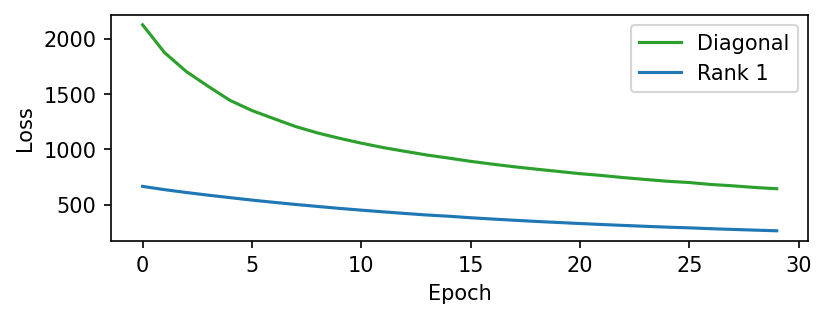

In [ ]:
#@title Plot loss values
fig, axs = plt.subplots(figsize=(6,2), dpi=150)

axs.plot(np.load('diagonal_loss.npy'),
         color='tab:green',
         label='Diagonal')

axs.plot(np.load('lowrank1_loss.npy'),
         color='tab:blue',
         label=f'Rank {Σ_rank}')

axs.set_xlabel('Epoch')
axs.set_ylabel('Loss')

plt.legend(loc='upper right')
plt.show()